In [65]:
# Import Libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split    # To split the dataset into train and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder   # For scaling and encoding categorical variables
from sklearn.compose import ColumnTransformer           # To apply transformers to specific columns
from sklearn.impute import SimpleImputer                # For handling missing data
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.svm import SVC                            # Support Vector Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score # For evaluating the model
import joblib


In [66]:
#import the data
hr_data = pd.read_csv('resources/HR-Employee-Attrition.csv')
hr_data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [67]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [68]:
hr_data['Attrition'] = hr_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) # Convert the target variable to binary


In [69]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [70]:
hr_data.select_dtypes(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [71]:
print(hr_data['BusinessTravel'].value_counts())
print("--------------------------------")
print(hr_data['Department'].value_counts())
print("--------------------------------")
print(hr_data['EducationField'].value_counts())
print("--------------------------------")
print(hr_data['Gender'].value_counts())
print("--------------------------------")




BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
--------------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
--------------------------------


In [72]:
print(hr_data['JobRole'].value_counts())
print("--------------------------------")
print(hr_data['MaritalStatus'].value_counts())
print("--------------------------------")
print(hr_data['Over18'].value_counts())
print("--------------------------------")
print(hr_data['OverTime'].value_counts())

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
--------------------------------
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
--------------------------------
Over18
Y    1470
Name: count, dtype: int64
--------------------------------
OverTime
No     1054
Yes     416
Name: count, dtype: int64


In [73]:
#check for missing values
hr_data.isnull().sum()  

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [74]:
# label encoder for binary columns
binary_cols = ['OverTime', 'Over18', 'Gender']
label_encoder = LabelEncoder()
for col in binary_cols:
    hr_data[col] = label_encoder.fit_transform(hr_data[col])

# get dummies for the rest of the categorical columns
catergorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
hr_data_encoded = pd.get_dummies(hr_data, columns=catergorical_cols, drop_first=True)

In [75]:
hr_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   Gender                             1470 non-null   int64
 9   HourlyRate                         1470 non-null   int64
 10  JobInvolvement                     1470 non-null   int64
 11  JobLevel                           1470 non-null   int64
 12  JobSatisfaction     

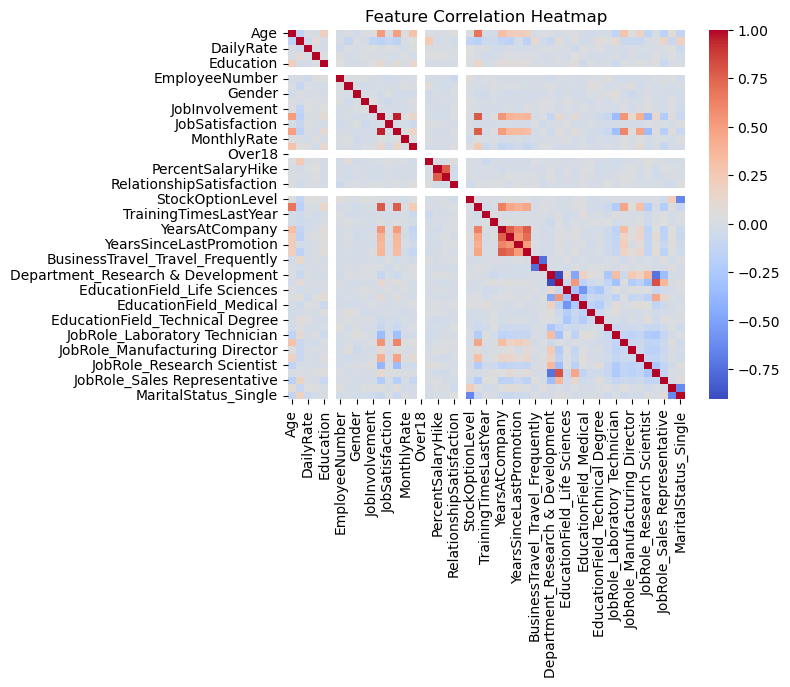

In [76]:
correlation_matrix = hr_data_encoded.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [77]:
attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)
print(attrition_corr)

Attrition                            1.000000
OverTime                             0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender                               0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

In [78]:
attrition_corr = attrition_corr.dropna()
print(attrition_corr)

Attrition                            1.000000
OverTime                             0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender                               0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

In [79]:
X = hr_data_encoded.drop(columns='Attrition')
y = hr_data_encoded['Attrition'].values.reshape(-1,1) 

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [80]:

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                              Feature  Importance
12                      MonthlyIncome    0.066898
0                                 Age    0.058708
1                           DailyRate    0.053085
16                           OverTime    0.051895
13                        MonthlyRate    0.049282
5                      EmployeeNumber    0.046870
22                  TotalWorkingYears    0.044900
8                          HourlyRate    0.042199
2                    DistanceFromHome    0.040628
25                     YearsAtCompany    0.039847
14                 NumCompaniesWorked    0.032871
17                  PercentSalaryHike    0.032018
28               YearsWithCurrManager    0.028869
6             EnvironmentSatisfaction    0.028411
21                   StockOptionLevel    0.027415
11                    JobSatisfaction    0.026916
26                 YearsInCurrentRole    0.025329
10                           JobLevel    0.023791
24                    WorkLifeBalance    0.023519


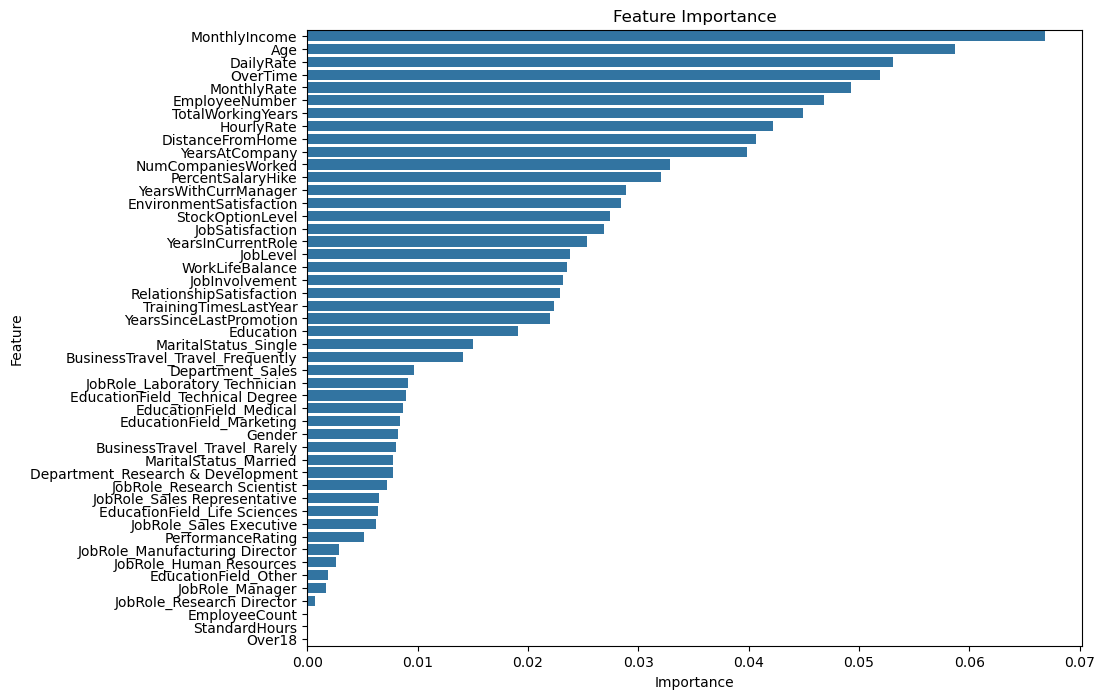

In [81]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()

In [82]:
irrelevant_features = feature_importance[feature_importance['Importance'] < 0.02]['Feature'].values
print(irrelevant_features)

['Education' 'MaritalStatus_Single' 'BusinessTravel_Travel_Frequently'
 'Department_Sales' 'JobRole_Laboratory Technician'
 'EducationField_Technical Degree' 'EducationField_Medical'
 'EducationField_Marketing' 'Gender' 'BusinessTravel_Travel_Rarely'
 'MaritalStatus_Married' 'Department_Research & Development'
 'JobRole_Research Scientist' 'JobRole_Sales Representative'
 'EducationField_Life Sciences' 'JobRole_Sales Executive'
 'PerformanceRating' 'JobRole_Manufacturing Director'
 'JobRole_Human Resources' 'EducationField_Other' 'JobRole_Manager'
 'JobRole_Research Director' 'EmployeeCount' 'StandardHours' 'Over18']


In [83]:
X = X.drop(columns=irrelevant_features)

In [84]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Previous Days work BELOW

In [ ]:

#apply onehotencoding to the categorical variables
categorical_columns = hr_data.select_dtypes(include=['object']).columns.tolist()
#categorical_columns
hr_data_encoded = pd.get_dummies(hr_data, columns=categorical_columns, drop_first=True)
hr_data_encoded.head()

In [ ]:
hr_data_encoded.info()

In [ ]:
hr_data_encoded.columns

In [ ]:
# Split the data into training and testing sets
X = hr_data_encoded.drop(columns='Attrition')
y = hr_data_encoded['Attrition'].values.reshape(-1,1)  
y[:5]

In [ ]:
hr_data_encoded['Attrition'].value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
# Instantiate the SMOTE instance 
# Set the sampling_strategy parameter equal to auto
smote_hr_data = SMOTE(random_state=1, sampling_strategy='auto')

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train.describe()


In [ ]:
# Fit the training data to the smote_sampler model
X_resampled, y_resampled = smote_hr_data.fit_resample(X_train, y_train)

In [ ]:
hr_data_encoded['Attrition'].value_counts() 

In [ ]:
#rf_model = RandomForestClassifier(n_estimators=128, random_state=78)
#rf_model = rf_model.fit(X_train, y_train)

In [ ]:
#clean the dataset
#delete columns that are not needed
#hr_data_drop = hr_data.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'EducationField', 'TrainingTimesLastYear', 'Department', 'Gender', 'NumCompaniesWorked', 'MaritalStatus', 'JobLevel'])
#hr_data_drop.tail(10)


In [ ]:
#hr_data_drop.columns

In [ ]:
#view JobRole column
#hr_data_drop['JobRole'].value_counts()

In [ ]:
#view JobInvolvement column
#hr_data_drop['JobInvolvement'].value_counts() 

In [ ]:
#check for missing values

In [ ]:
# Drop rows with missing values
#hr_data_drop = hr_data_drop.dropna()

In [ ]:
#Check the datatypes on JonInvolvement
#hr_data_drop['JobInvolvement'].dtypes
